In [ ]:
# Import different libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
# load dataset
data = pd.read_csv("/content/drive/MyDrive/SelectedData.csv")
print(data)

       qty_dot_url  qty_hyphen_url  ...  url_shortened  phishing
0                3               0  ...              0         1
1                5               0  ...              0         1
2                2               0  ...              0         0
3                4               0  ...              0         1
4                2               0  ...              0         0
...            ...             ...  ...            ...       ...
88642            3               1  ...              0         0
88643            2               0  ...              0         0
88644            2               1  ...              0         1
88645            2               0  ...              0         1
88646            2               0  ...              0         0

[88647 rows x 54 columns]


In [ ]:
# 
x = data.drop(['phishing'], axis = 'columns')
y = data['phishing']

In [ ]:
# Split data for testing and training the model
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size= 0.2)

In [ ]:
# Create the model
model = XGBClassifier(max_depth = 10, learning_rate= 0.2 ,n_estimators=4500)

# Fit the model with training data
model.fit(x_Train, y_Train)

XGBClassifier(learning_rate=0.2, max_depth=10, n_estimators=4500)

In [ ]:
# Test the model with testing dataset
model.score(x_Test, y_Test)

0.9739988719684152

In [ ]:
# Feature Importances
importantFeature = model.feature_importances_
print(importantFeature)

[0.00957674 0.00626078 0.00696783 0.10392825 0.01421815 0.01126989
 0.00931192 0.00828502 0.05115924 0.00729307 0.01634696 0.00505436
 0.02525759 0.00238373 0.00186205 0.00212963 0.01302881 0.00510642
 0.02014443 0.00521617 0.00178677 0.03202605 0.01479998 0.00534924
 0.22370026 0.00259539 0.00994528 0.00942385 0.06399988 0.01958228
 0.00362517 0.02125474 0.00337059 0.06891752 0.00332683 0.0015152
 0.00541798 0.0143654  0.05686487 0.00340459 0.00290908 0.0048215
 0.0049007  0.01928274 0.00263657 0.01314515 0.00605252 0.00501194
 0.00335243 0.00360865 0.00473389 0.00872296 0.03074889]


In [ ]:
# run loop through importantFeature
# find out the feature having importance 0
zeroImp = []
for index, value in enumerate(importantFeature):
  if value < 0.00626078:
    zeroImp.append(index+1)
# delete them

In [ ]:
for i in range(len(zeroImp)):
  data.drop([i])

In [ ]:
zeroImp

[12,
 14,
 15,
 16,
 18,
 20,
 21,
 24,
 26,
 31,
 33,
 35,
 36,
 37,
 40,
 41,
 42,
 43,
 45,
 47,
 48,
 49,
 50,
 51]

In [ ]:
from numpy import sort
sortedFeature = sort(importantFeature)
sortedFeature

array([0.0015152 , 0.00178677, 0.00186205, 0.00212963, 0.00238373,
       0.00259539, 0.00263657, 0.00290908, 0.00332683, 0.00335243,
       0.00337059, 0.00340459, 0.00360865, 0.00362517, 0.00473389,
       0.0048215 , 0.0049007 , 0.00501194, 0.00505436, 0.00510642,
       0.00521617, 0.00534924, 0.00541798, 0.00605252, 0.00626078,
       0.00696783, 0.00729307, 0.00828502, 0.00872296, 0.00931192,
       0.00942385, 0.00957674, 0.00994528, 0.01126989, 0.01302881,
       0.01314515, 0.01421815, 0.0143654 , 0.01479998, 0.01634696,
       0.01928274, 0.01958228, 0.02014443, 0.02125474, 0.02525759,
       0.03074889, 0.03202605, 0.05115924, 0.05686487, 0.06399988,
       0.06891752, 0.10392825, 0.22370026], dtype=float32)

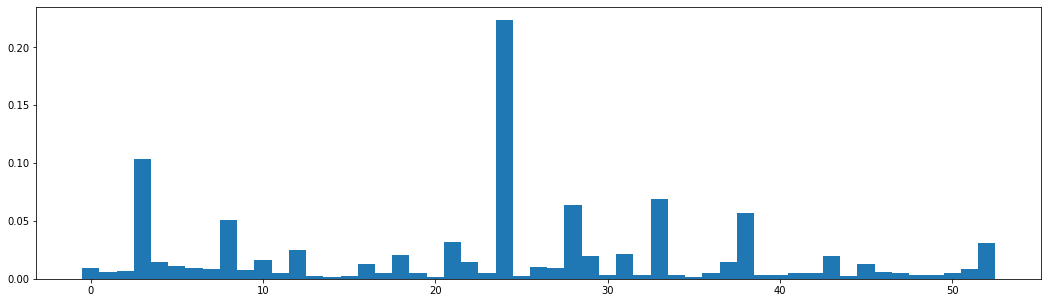

In [ ]:
# Plot the features
pyplot.figure(figsize=(18, 5))
pyplot.bar(range(len(importantFeature)), importantFeature, width = 1)
pyplot.show()

In [ ]:
# from numpy import sort
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectFromModel

In [ ]:
# # Fit model using each importance as a threshold
# thresholds = sort(importantFeature)
# for thresh in thresholds:
#   # select features using threshold
#   selection = SelectFromModel(model, threshold = thresh, prefit = True)
#   select_x_train = selection.transform(x_Train)
#   # train model
#   selection_model = XGBClassifier()
#   selection_model.fit(select_x_train, y_Train)
#   # evaluate model
#   select_x_test = selection.transform(x_Test)
#   y_Prediction = selection_model.predict(select_x_test)
#   predictions = [round(value) for value in y_Prediction]
#   accuracy = accuracy_score(y_Test, predictions)
#   print("Thresh = %.3f, n = %d, Accuracy: %.2f%%" % (thresh, select_x_train.shape[1], accuracy*100.0))